## Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df_train =pd.read_csv("train.csv")
df_test=pd.read_csv("gender_submission.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_train.shape

(891, 12)

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
print("Total passenger : ",len(df_train["PassengerId"]))

Total passenger :  891


In [11]:
survived = df_train[df_train["Survived"]==1]
print(f"Total passenger who is survived: {len(survived)}")

Total passenger who is survived: 342


In [12]:
not_survived =df_train[df_train["Survived"]==0]
print(f"Total passenger who is not survived: {len(not_survived)}")

Total passenger who is not survived: 549


In [13]:
print("Survived %= " ,1*len(survived)/len(df_train)*100)
print("NOt Survived % = " ,1*len(not_survived)/len(df_train)*100)

Survived %=  38.38383838383838
NOt Survived % =  61.61616161616161


Text(0, 0.5, 'counts')

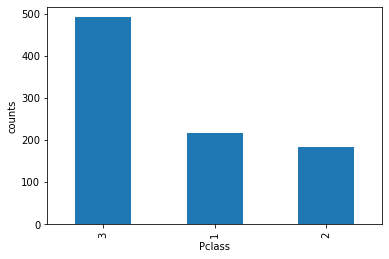

In [14]:
df_train["Pclass"].value_counts().plot(kind="bar");

plt.xlabel("Pclass")
plt.ylabel("counts")

### Here we see who stay in P1class have more higher rate of survival than others

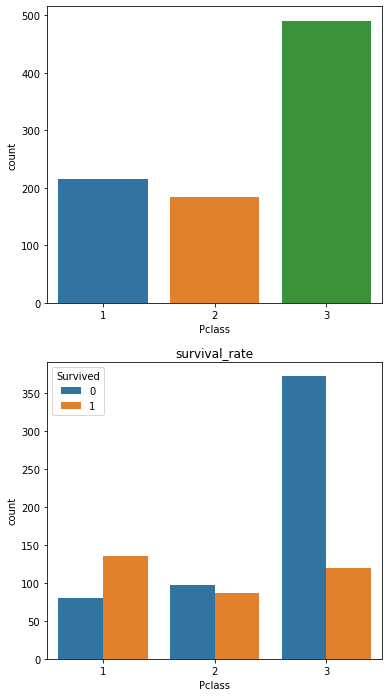

In [15]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x="Pclass" , data =df_train);
plt.subplot(212)
sns.countplot(x="Pclass", data =df_train,hue ="Survived")
plt.title("survival_rate");

### Sex is also plays important role in survival rate ,female has higher rate of survival than male

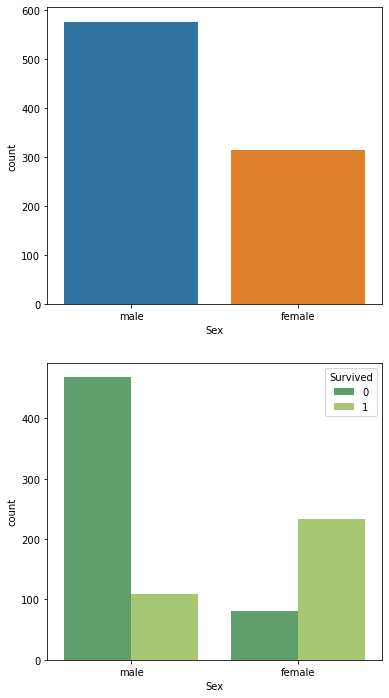

In [16]:
plt.figure(figsize =(6,12))
plt.subplot(211)
sns.countplot( x="Sex",data=df_train)
plt.subplot(212)
sns.countplot(x="Sex",data=df_train,hue="Survived",palette ="summer");

In [17]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

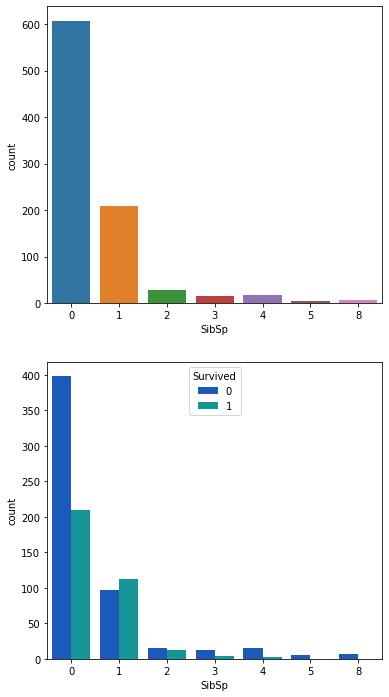

In [18]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x="SibSp", data=df_train)
plt.subplot(212)
sns.countplot(x="SibSp" ,data=df_train,hue="Survived",palette="winter");

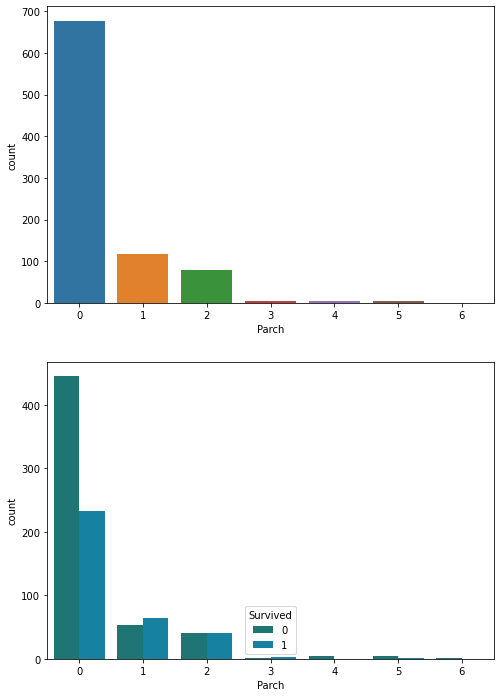

In [19]:
plt.figure(figsize=(8,12))
plt.subplot(211)
sns.countplot(x="Parch",data=df_train)
plt.subplot(212)
sns.countplot(x="Parch",data=df_train,hue="Survived",palette="winter_d");

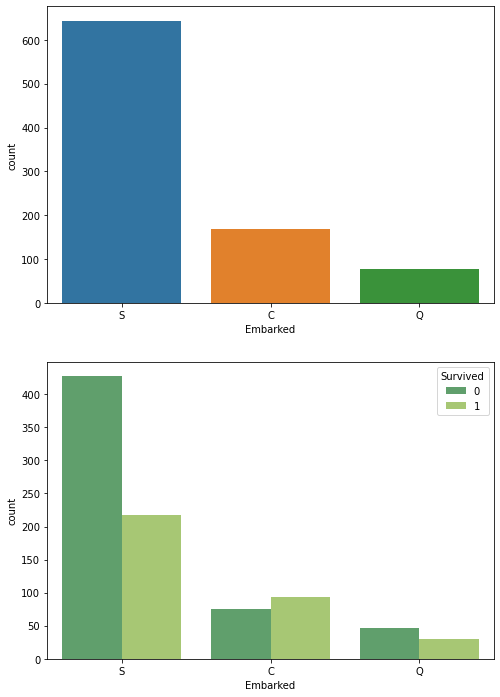

In [20]:
plt.figure(figsize=(8,12))
plt.subplot(211)
sns.countplot(x="Embarked",data=df_train)
plt.subplot(212)
sns.countplot(x="Embarked",data=df_train,hue="Survived",palette="summer");

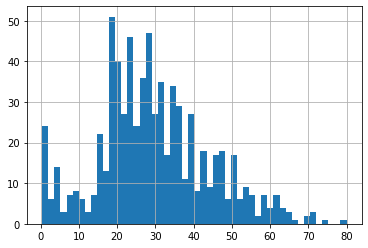

In [21]:
df_train["Age"].hist(bins=50);

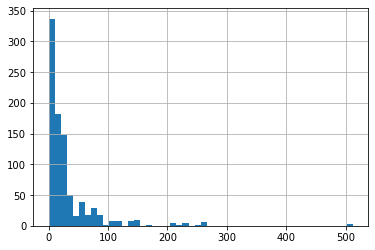

In [22]:
df_train["Fare"].hist(bins=50);

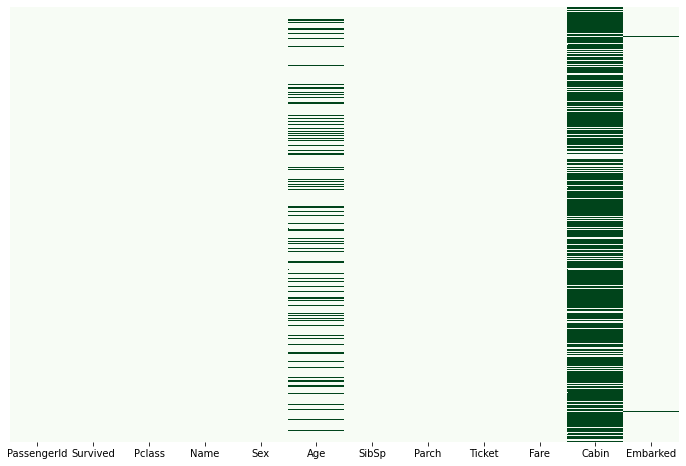

In [23]:
#check how many null value in data
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isnull(),yticklabels=False ,cbar=False,cmap="Greens");

In [24]:
print(df_train.isna().any())
print(df_train.loc[:,df_train.isna().any()])

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
      Age Cabin Embarked
0    22.0   NaN        S
1    38.0   C85        C
2    26.0   NaN        S
3    35.0  C123        S
4    35.0   NaN        S
..    ...   ...      ...
886  27.0   NaN        S
887  19.0   B42        S
888   NaN   NaN        S
889  26.0  C148        C
890  32.0   NaN        Q

[891 rows x 3 columns]


In [25]:
df_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [26]:
df_test.isnull().any()

PassengerId    False
Survived       False
dtype: bool

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df_train.groupby("Sex").agg({"Age":["mean"]})

,Age
,mean
Sex,
female,27.915709
male,30.726645


In [29]:
def fill_age(data):
    age = data[0]
    sex = data[1]
    if pd.isnull(age):
        if sex is "male":
            return 30
        else:
            return 27
    else:
        return age
    
df_train["Age"] = df_train[["Age","Sex"]].apply(fill_age,axis=1)

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-29-5f97a1def437>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sex is "male":


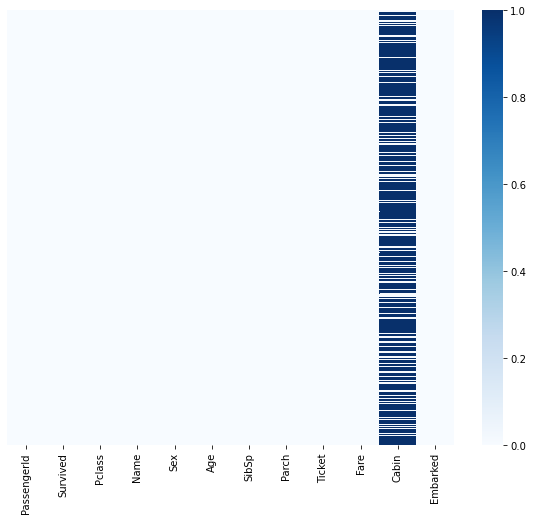

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap="Blues")

In [31]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

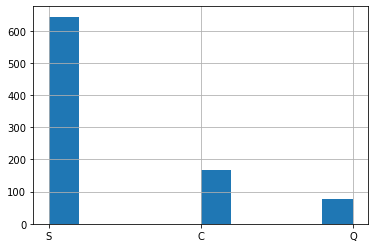

In [32]:
df_train["Embarked"].hist();

In [33]:
print(df_train["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [34]:
df_train["Embarked"].replace(np.nan,"S",inplace=True)

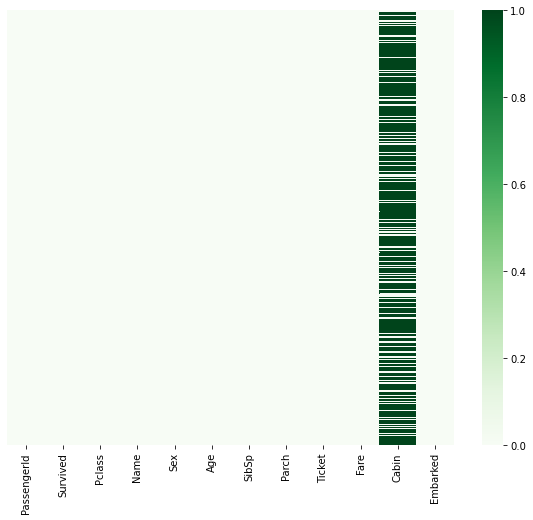

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap="Greens");

In [36]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [37]:
fare = df_train["Fare"].astype("float").mean(axis=0)#
fare

#df_test["Fare"].unique()

32.2042079685746

In [38]:
df_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [39]:
fare=df_train["Fare"].replace(np.nan,fare,inplace=True)

In [40]:
df_train.isnull().all()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [41]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
sex_var = pd.get_dummies(df_train["Sex"],drop_first=True)

In [43]:
sex_var

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [44]:
df_train=pd.concat([df_train,sex_var],axis=1)
df_train.drop("Sex",axis=1,inplace=True)

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [46]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
male           False
dtype: bool

In [47]:
#cabin has nan value ,so lets drop this column
df_train.drop("Cabin",axis=1,inplace=True)

In [48]:
df_train.drop("Name",axis=1,inplace=True)

In [49]:
df_train.head(
)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,35.0,1,0,113803,53.1000,S,0
4,5,0,3,35.0,0,0,373450,8.0500,S,1


In [50]:
embarked_var = pd.get_dummies(df_train["Embarked"],drop_first=True)
embarked_var

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [51]:
df_train = pd.concat([df_train,embarked_var],axis=1)
df_train.drop("Embarked",axis=1,inplace=True)

In [52]:
df_train = df_train.rename(columns={"Q":"Embarked_Q","S":"Embarked_S"})

In [58]:
df_train.drop("Ticket",axis=1,inplace=True)

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
X = df_train.drop("Survived",axis=1).values

In [61]:
y = df_train["Survived"].values

In [62]:
print(X.shape)
print(y.shape)

(891, 9)
(891,)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()
X = sc.fit_transform(X)
df_train = sc.fit_transform(df_train)

In [64]:
X

array([[-1.73010796,  0.82737724, -0.5493354 , ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.72622007, -1.56610693,  0.67772773, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [-1.72233219,  0.82737724, -0.24256962, ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 1.72233219,  0.82737724, -0.16587817, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [ 1.72622007, -1.56610693, -0.24256962, ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 1.73010796,  0.82737724,  0.21757905, ...,  0.73769513,
         3.25137334, -1.62380254]])

In [75]:
lin_model = LogisticRegression(random_state=10)
lin_model.fit(X,y)

LogisticRegression(random_state=10)

In [81]:
y_pred = lin_model.predict(X)

In [84]:
y_pred[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [88]:
print(accuracy_score(y_pred,y_pred))

1.0


In [89]:
print(confusion_matrix(y, y_pred))


[[470  79]
 [100 242]]
